# Introduction to Regression Analysis

## Learning Objectives 
- Learn the definition and purpose of regression analysis and its applications in statistical modeling.
- Recognise different types of regression models, including simple linear regression, multiple linear regression, and logistic regression.
- Understand the roles of dependent and independent variables in a regression model.
- Learn how to use the `lm()` function to fit simple and multiple linear regression models.
- Gain the ability to interpret the meaning of coefficients in a regression model, including both slope and intercept.
- Learn the concept of hypothesis testing in the context of regression analysis and how to apply it to assess the significance of regression coefficients.
- Develop the skills to use fitted regression models to make predictions on new data.
- Understand the differences and relationships between regression analysis and other common statistical methods.

In [1]:
set.seed(123)
par(mar = c(4,4,1,1))
nSamples <- 250
height<-rnorm(nSamples, 180, 20)
sex<-as.factor(sample(c("male", "female"), size = nSamples, replace = TRUE, prob = c(0.45,0.55)))
height<-height + rnorm(nSamples, 10,5)*(as.numeric(sex)-1)
age<-floor(runif(nSamples, 40,60))
weight<- height * 0.7 - 44 + rnorm(nSamples,0,12)

weight<-weight + rnorm(nSamples, 3, 2)*(as.numeric(sex)-1) + rnorm(nSamples, 0.005, 0.001)*(as.numeric(sex)-1) * height
weight <- weight + age * rnorm(nSamples, 0.04, 0.03)
bmi <- weight/(height/100)^2

smoker<-sample(c(0,1), size = nSamples, replace = TRUE, prob = c(0.8,0.2))
t2diabetes <- sample(c(0,1), size = nSamples, replace = TRUE, prob = c(0.8,0.2))
t2diabetes[sample(which(bmi > 25),10)]<-1
t2diabetes[sample(which(smoker == 1),5)]<-1

exercise_hours <- rpois(nSamples, 1) + rpois(nSamples, 2)*(1-t2diabetes) + rpois(nSamples, 1) * (as.numeric(sex)-1)
alcohol_units <- rpois(nSamples, 3) + rpois(nSamples, 5)*(1-t2diabetes) + rpois(nSamples, 3) * (as.numeric(sex)-1) + rpois(nSamples, 1)*rpois(nSamples, 6)*(1-t2diabetes) 
exercise_hours[which(weight < 60)]<-rpois(sum(weight < 60), 12)
alcohol_units[which(bmi > 37)]<-alcohol_units[which(bmi > 37)] + rpois(sum(bmi > 37),5)
alcohol_units[which(weight > 140)]<-rpois(sum(weight > 140),50)

ethnicity<-sample(c("European", "Asian", "AfricanAmerican"), nSamples, replace = TRUE, prob = c(0.6,0.25,0.15))
socioeconomic_status <- sample(c("High", "Middle", "Low"), nSamples, replace = TRUE, prob = c(0.25,0.5,0.25))
socioeconomic_status[which(bmi > 25)] <- sample(c("High", "Middle", "Low"), sum(bmi > 25), replace = TRUE, prob = c(0.1,0.25,0.65))

demoDat <-data.frame(age, height, weight, bmi, ethnicity, socioeconomic_status, smoker, exercise_hours, alcohol_units, t2diabetes)

# Introduction to Regression

## What is Regression?

Regression analysis is a broad category of analyses where the objective is to statistically quantify relationships between variables.

It enables you to:

* understand which variables affect other variables and how
* make predictions from a new set of data

It involves fitting a prespecified model to data, where model is a mathematical description of the relationship between the variables. Observed data is then used to determine what numbers or coefficients the model should have. 

A regression model requires:

* dependent variable(s) - the outcome or variable you are trying to predict
* independent variable(s) - the predictors, features, covariates or explanatory variable(s)

You may also know regression as fitting a line to data as in the example below. We can think of a line as a graphical representation of a model. Note by line we are not limited to just a straight line.

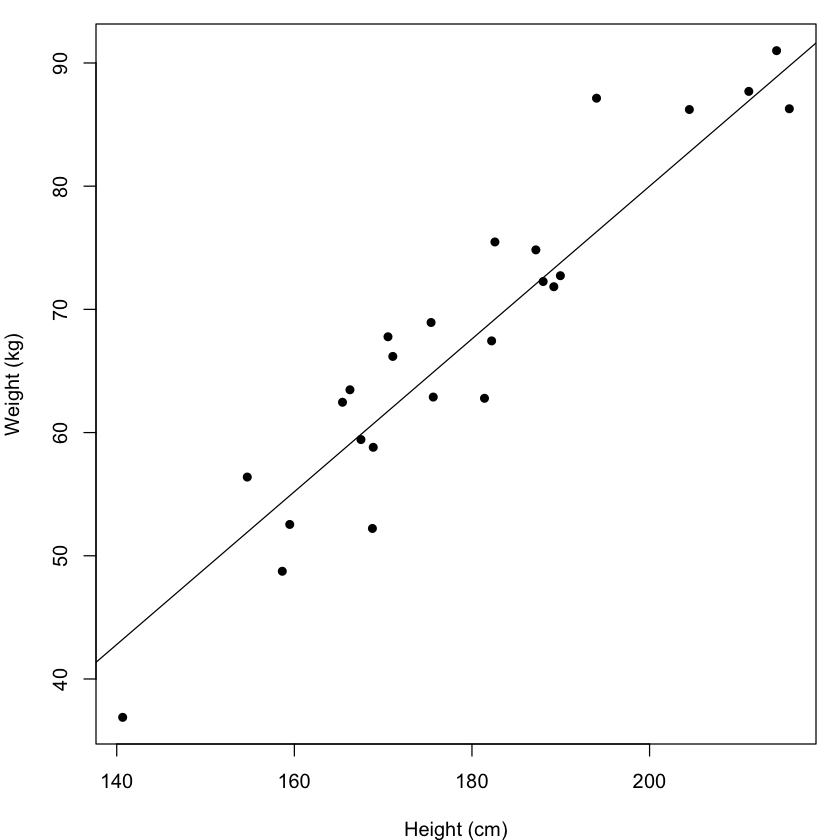

In [2]:
set.seed(123)
par(mar = c(4,4,1,1))
nSamples <- 25
height<-rnorm(nSamples, 180, 20)
weight<- height * 0.62 - 44 + rnorm(nSamples,0,5)

plot(height, weight, pch = 16, col = , xlab = "Height (cm)", ylab = "Weight (kg)")
abline(a = -44, b = 0.62)

## What is a line?

To understand a bit more about regression parameters we are going to recap what a line is, specifically a straight line, in a mathematical sense. If we have two continuous variables such as height and weight, measured on the same set of individuals, we can visualise the relationship with a scatterplot like the one above.  From this plot we can try to generalise the relationship by drawing a straight line through the points. From this line we can make predictions of what weight a person might have if we know their height. 

What enables us to do this, is the fact that we can represent this line and therefore this relationship as an equation. The standard equation for a straight line between two variables Y and X:

$$
Y = \theta_{0} + \theta_{1} X
$$

You may have learnt this previously as 

$$Y = c  + m X$$

These two equations are equivalent - we have just used different notations for the coefficients. The coefficients are the value that we multiply our predictor variables by, and what we want to estimate from our data. They are sometimes called parameters.

There are two regression coefficients in this equation: 

1. Intercept ($\theta_{0}$ ) - This is the value of the outcome variable when the predictor is set to 0. 
2. Slope coefficient ($\theta_{1}$) - This is the change in the outcome variable for each unit of the predictor variable.

When we know the values of these coefficients, we can then input different values of X to make predictions for Y. What's more, changing the values of these coefficients changes the position of the line in the graph and, ultimately, the relationship between X and Y. Below we showcase a number of different lines. Can you characterise what is happening? 


## What is a line?

To understand a bit more about regression parameters we are going to recap what a line is, specifically a straight line, in a mathematical sense. If we have two continuous variables such as height and weight, measured on the same set of individuals, we can visualise the relationship with a scatterplot like the one above.  From this plot we can try to generalise the relationship by drawing a straight line through the points. From this line we can make predictions of what weight a person might have if we know their height. 

What enables us to do this, is the fact that we can represent this line and therefore this relationship as an equation. The standard equation for a straight line between two variables Y and X:

$$
Y = \theta_{0} + \theta_{1} X
$$

You may have learnt this previously as 

$$Y = c  + m X$$

These two equations are equivalent - we have just used different notations for the coefficients. The coefficients are the value that we multiply our predictor variables by, and what we want to estimate from our data. They are sometimes called parameters.

There are two regression coefficients in this equation: 

1. Intercept ($\theta_{0}$ ) - This is the value of the outcome variable when the predictor is set to 0. 
2. Slope coefficient ($\theta_{1}$) - This is the change in the outcome variable for each unit of the predictor variable.

When we know the values of these coefficients, we can then input different values of X to make predictions for Y. What's more, changing the values of these coefficients changes the position of the line in the graph and, ultimately, the relationship between X and Y. Below we showcase a number of different lines. Can you characterise what is happening? 


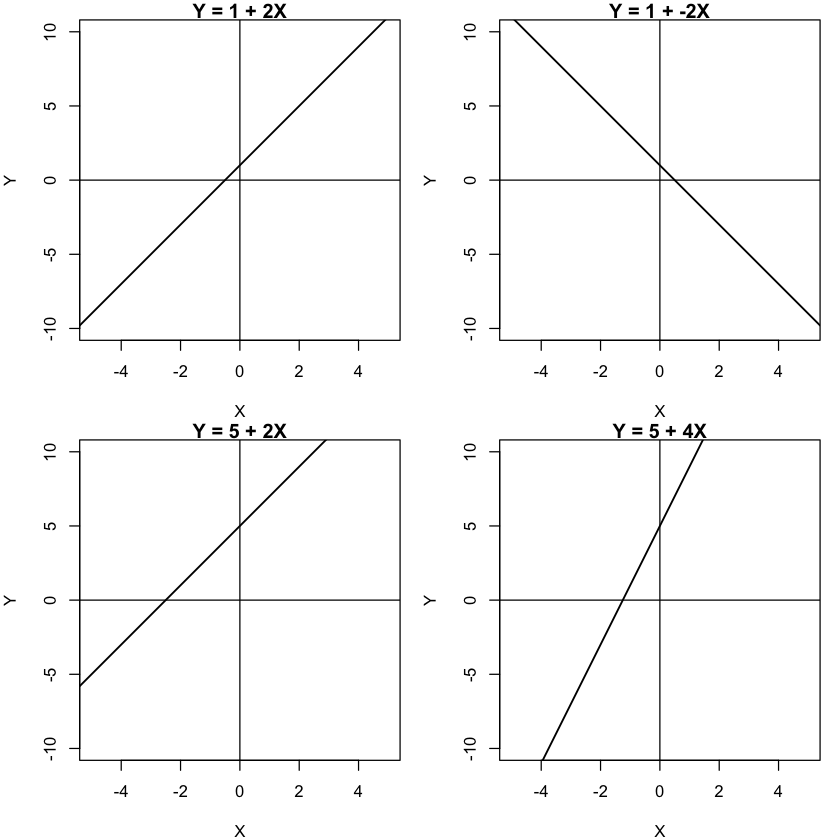

In [3]:
par(mar = c(4,4,1,1))
par(mfrow = c(2,2))

plot(0, 1, type = "n", col = , xlab = "X", ylab = "Y", main = "Y = 1 + 2X", xlim = c(-5,5), ylim = c(-10,10))
abline(a = 1, b = 2, lwd = 1.5)
abline(v = 0)
abline(h = 0)

plot(0, 1, type = "n", col = , xlab = "X", ylab = "Y", main = "Y = 1 + -2X", xlim = c(-5,5), ylim = c(-10,10), lwd = 1.5)
abline(a = 1, b = -2, lwd = 1.5)
abline(v = 0)
abline(h = 0)


plot(0, 1, type = "n", col = , xlab = "X", ylab = "Y", main = "Y = 5 + 2X", xlim = c(-5,5), ylim = c(-10,10), lwd = 1.5)
abline(a = 5, b = 2, lwd = 1.5)
abline(v = 0)
abline(h = 0)

plot(0, 1, type = "n", col = , xlab = "X", ylab = "Y", main = "Y = 5 + 4X", xlim = c(-5,5), ylim = c(-10,10), lwd = 1.5)
abline(a = 5, b = 4, lwd = 1.5)
abline(v = 0)
abline(h = 0)

What you should observe is that changing $\theta_{1}$ changes the slope of the line: 

* the direction of the line changes depending if the parameter is negative or positive

* the steepness of the slope is determined by the magnitude of this coefficient. 

This is the coefficient that captures the relationship between our variables X and Y and enables us to model an unlimited number of linear relationships between these variables.  

You might also have observed that if we change the value of $\theta_0$, i.e the intercept, the line moves up and down. The intercept is important if we are interested in making predictions but not so important if we want to understand how changing X influences Y. 

## Fitting a Simple Linear Regression Model in R

We want to fit our line to a specific set of data where we collected paired values for X and Y to enable us estimate the values of $\theta_{0}$ and $\theta_{1}$. It is out of the scope of this material to examine the precise mathematical details of how this is done, but it is important to understand that the principle behind the methodology is to draw the line that "best" fits the data by having the lowest total error. Here the error is defined as the difference between the observed value of Y and the predicted value of Y given X and our estimated model. 

In R, linear regression models can be fitted with the base function `lm()`. Let's continue with our height and weight example. These data are available within this tutorial in the R object `demoDat`. In our R code we will use the formula style to specify the model we want to fit. You may recognise this type of syntax from other statistical functions such as `t.test()` or even plotting functions such as `boxplot()`. The equation of the line we wish to fit needs to be provided as an argument to the `lm` function:


In [4]:
lm(weight ~ height, data = demoDat)


Call:
lm(formula = weight ~ height, data = demoDat)

Coefficients:
(Intercept)       height  
   -39.5220       0.6988  


The dependent variable (taking the place of Y in the standard equation for a line above) goes on the left hand side of the `~` symbol. The predictor variable goes on the right hand side (taking the place of X in the standard equation for a line above). The code we have written is specifying the model:

$$weight = \theta_0 + \theta_1 height$$

Note that we did not need to explicitly specify either the 

* intercept ($\theta_0$)

or

* regression coefficient  ($\theta_1$)

R knows to add these in automatically. 

Let's run this bit of code

In [5]:
lm(weight ~ height, data = demoDat)


Call:
lm(formula = weight ~ height, data = demoDat)

Coefficients:
(Intercept)       height  
   -39.5220       0.6988  


If we execute just the `lm()` function it only prints a subset of the possible output:  

* the formula we called  
* the estimates of the coefficients derived from our observed data.  

From these coefficients we can specify the line that has been calculated to represent the relationship between these variables.



In [6]:
model <- lm(weight ~ height, data = demoDat)

We can see that the estimated value for the intercept is `signif(summary(model)$coefficients[1,1], 4)` and the estimated value for the height slope coefficient is `signif(summary(model)$coefficients[2,1], 4)`. As the height parameter is positive, we can conclude that weight increases as the participants get taller. More than that, we can quantify by how much. The value of the regression parameter for height tells us by how much weight changes for a one unit increase in height. To interpret this, we need to know the units of our variables. In this example height is measured in cm and weight in kg, so the value of our regression coefficient means that for each extra centimetre, an individual's weight increases by a mean of `signif(summary(model)$coefficients[2,1],2)`kg.

In [7]:
equation = paste0("$weight =",  signif(summary(model)$coefficients[1,1],3), " + ", signif(summary(model)$coefficients[2,1],3), " * Height$")

We can write our estimated regression model as: `equation`.

## Simple Linear Regression Exercise 

*Let's practice fitting and interpretting the output of a simple linear regression model.*

Write the R code required to characterise how `bmi` changes as the participants `age`. Both of these variables are available in the `demoDat` object you already have loaded in this tutorial. 


```{admonition} Solution
:class: dropdown
``` R
lm(bmi ~ age, data = demoDat)
```
```

## Summary Quiz

In [8]:
# Call the function to display quiz interactively:
source("../../R_functions/quiz_renderer.R")
show_quiz_from_json("questions/summary_linear_model_questions.json")

What is the value of the intercept? 
 0.04 
 1 
 24.2 
 47.4 
 
 Submit
 
 The slope coefficient is 0.04, which is the correct interpretation? 
 bmi increases by 0.04 per year of age 
 age increases by 0.04 year per 1 unit of bmi 
 
 Submit
 
 What is the predicted BMI for a participant aged 45? 
 1.9 
 24.2 
 25.2 
 26.1 
 
 Submit